In [9]:
import sys, os

# add project root (one level up from notebooks/) to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd
from src.config import DATA_DIR

data_path = DATA_DIR / "CyberBulling_Dataset_Bangla.xlsx"
df = pd.read_excel(data_path)
df.head()

,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,3,বোকাচোদা একটা।,sexual
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Drop index-like column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.head()


,Description,Label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,বোকাচোদা একটা।,sexual
4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual


In [ ]:
# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isna().sum())


Shape: (6010, 2)

Columns: ['Description', 'Label']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  6010 non-null   object
 1   Label        6010 non-null   object
dtypes: object(2)
memory usage: 94.0+ KB
None

Missing values:
Description    0
Label          0
dtype: int64


In [20]:
# Label distribution
print("\nLabel distribution:")
print(df['Label'].value_counts())
print("\nLabel distribution (proportion):")
print(df['Label'].value_counts(normalize=True))

# normalise labels to lower-case
print("\nLabels after normalisation:")
df['Label'] = df['Label'].str.lower()
print(df['Label'].value_counts())



Label distribution:
Label
political    1205
troll        1202
sexual       1201
threat       1201
neutral      1201
Name: count, dtype: int64

Label distribution (proportion):
Label
political    0.200499
troll        0.200000
sexual       0.199834
threat       0.199834
neutral      0.199834
Name: proportion, dtype: float64

Labels after normalisation:
Label
political    1205
troll        1202
sexual       1201
threat       1201
neutral      1201
Name: count, dtype: int64


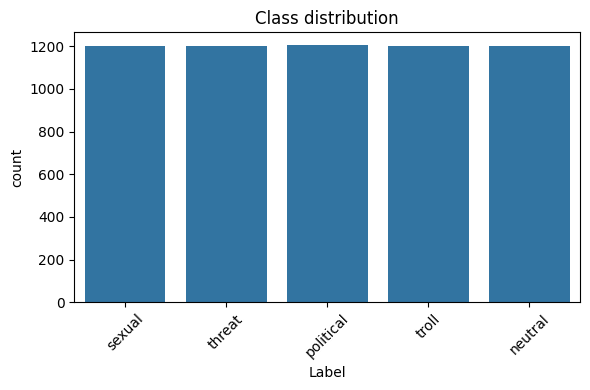

In [19]:
# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title("Class distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Text length features
df['char_len'] = df['Description'].astype(str).str.len()
df['word_len'] = df['Description'].astype(str).str.split().str.len()

print("\nCharacter length stats:")
print(df['char_len'].describe())
print("\nWord length stats:")
print(df['word_len'].describe())



Character length stats:
count    5860.000000
mean       99.200000
std       137.825757
min         2.000000
25%        28.750000
50%        55.000000
75%       110.000000
max      1767.000000
Name: char_len, dtype: float64

Word length stats:
count    5860.000000
mean       17.154266
std        22.618977
min         1.000000
25%         5.000000
50%        10.000000
75%        19.000000
max       210.000000
Name: word_len, dtype: float64


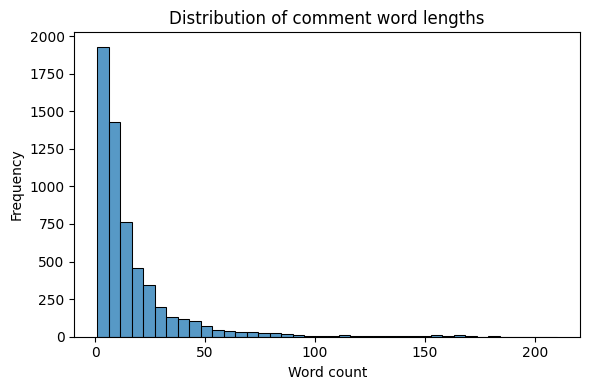

In [60]:
# Histograms of length
plt.figure(figsize=(6,4))
sns.histplot(df['word_len'], bins=40)
plt.title("Distribution of comment word lengths")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [26]:
print(df[df['Description'].astype(str).str.len()< 5])

     Description    Label  char_len  word_len
26          নুনু   sexual         4         1
328         মাগি   sexual         4         1
968          মাল   sexual         3         1
1237         চোপ   threat         3         1
1724          মর   threat         2         1
2002        কোপা   threat         4         1
3763        নেশা    troll         4         1
4220         বাল    troll         3         1
4254        ময়দা    troll         4         1
4285        শালা    troll         4         1
4689         বলত    troll         3         1
5082        উফ!!  neutral         4         1
5125        সোফা  neutral         4         1
5401        মাখন  neutral         4         1
5626        ময়না  neutral         4         1
5642        কুইন  neutral         4         1
5798        বাকি  neutral         4         1
5939        সহমত  neutral         4         1
5980        বইনে  neutral         4         1


In [ ]:
# Length by label
print("\nLength by label:")
print(df.groupby('Label')[['char_len', 'word_len']].agg(['mean', 'std', 'min', 'max']))


Length by label:
             char_len                         word_len                    
                 mean         std min   max       mean        std min  max
Label                                                                     
neutral     77.525396  111.600237   4  1000  12.836803  17.514708   1  180
political  115.214108  105.591392  17   498  20.119502  18.157506   3   95
sexual     124.567027  189.669614   3  1767  21.270608  30.091763   1  210
threat      97.727727  145.495555   2  1000  17.188177  24.576877   1  183
troll       87.455075  116.341282   3  1000  15.553245  19.982321   1  180



 --------- Length stats per label: ---------
          char_len                          word_len                       
              mean median     std min   max     mean median    std min  max
Label                                                                      
neutral      77.58   42.5  111.63   4  1000    12.85    7.0  17.52   1  180
political   111.85   73.5  102.49  17   498    19.48   13.0  17.52   3   95
sexual      123.65   62.0  188.26   3  1767    21.10   11.0  29.82   1  210
threat       97.51   49.0  145.39   2  1000    17.15    8.5  24.55   1  183
troll        86.77   48.0  115.43   3  1000    15.44    9.0  19.82   1  180


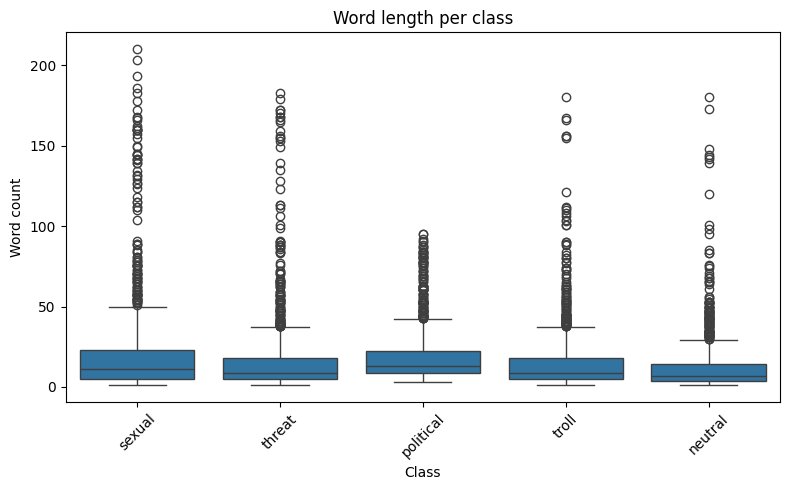

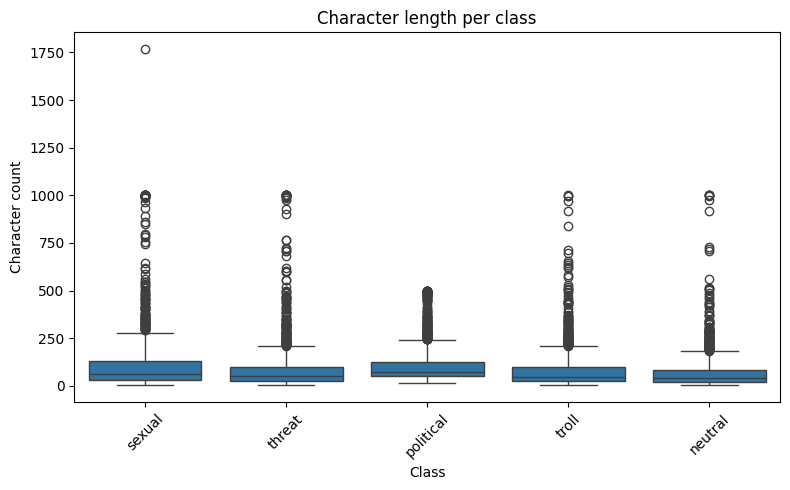

In [39]:
# Summary stats per label
length_stats = (
    df.groupby("Label")[["char_len", "word_len"]]
      .agg(["mean", "median", "std", "min", "max"])
      .round(2)
)
print("\n --------- Length stats per label: ---------")
print(length_stats)

# Boxplot: word length by label
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Label", y="word_len")
plt.title("Word length per class")
plt.xlabel("Class")
plt.ylabel("Word count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: character length by label
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Label", y="char_len")
plt.title("Character length per class")
plt.xlabel("Class")
plt.ylabel("Character count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# from collections import Counter
# from sklearn.feature_extraction.text import CountVectorizer

# N-gram & keyword patterns per class

def top_terms_for_class(df, label_col, text_col, target_label, n_top=15, ngram_range=(1, 1), min_df=1):
    """
    Compute top n terms for a given class using simple frequency with CountVectorizer.
    """
    texts = df[df[label_col] == target_label][text_col].tolist()

    vectorizer = CountVectorizer(
        analyzer="word",
        ngram_range=ngram_range,
        min_df=min_df
    )
    X = vectorizer.fit_transform(texts)
    freqs = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vectorizer.get_feature_names_out())

    top_idx = freqs.argsort()[::-1][:n_top]
    top_terms = pd.DataFrame({
        "term": terms[top_idx],
        "frequency": freqs[top_idx]
    })
    return top_terms

labels = sorted(df["Label"].unique())

# Top unigrams per class
top_unigrams_per_class = {}
for lbl in labels:
    print(f"\n---- Top unigrams for class: {lbl} -----")
    top_uni = top_terms_for_class(
        df=df,
        label_col="Label",
        text_col="Description",
        target_label=lbl,
        n_top=15,
        ngram_range=(1, 1),
        min_df=2,
    )
    top_unigrams_per_class[lbl] = top_uni
    print(top_uni.to_string(index=False))




---- Top unigrams for class: neutral -----
term  frequency
  কর        513
 আপন        302
  আল        250
  আম        239
  অন        161
  জন        158
  আর        134
  মন        125
  বল        124
  এই        108
  পর        107
  সব        104
  হয়        103
  দর        102
  হব         80

---- Top unigrams for class: political -----
term  frequency
  রত        601
  কর        486
  আম        280
  আর        274
  জন        221
  হয়        213
  এই        175
  হল        160
  মন        159
  বল        149
 একট        132
  সব        114
  পর        113
  হব        108
 আপন        106

---- Top unigrams for class: sexual -----
term  frequency
  কর        817
  আম        351
 আপন        306
  আল        305
  আর        235
  জন        233
  বল        233
  পর        200
  কথ        182
  সব        179
  মন        177
  হয়        176
  এই        175
  হল        169
 একট        160

---- Top unigrams for class: threat -----
term  frequency
  কর        719
 আপন        217
  এই    

/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/y_/915f7xdj6rj1jcxp6zd5k9lw0000gn/T/ipykernel_55685/2104576070.py:10: 

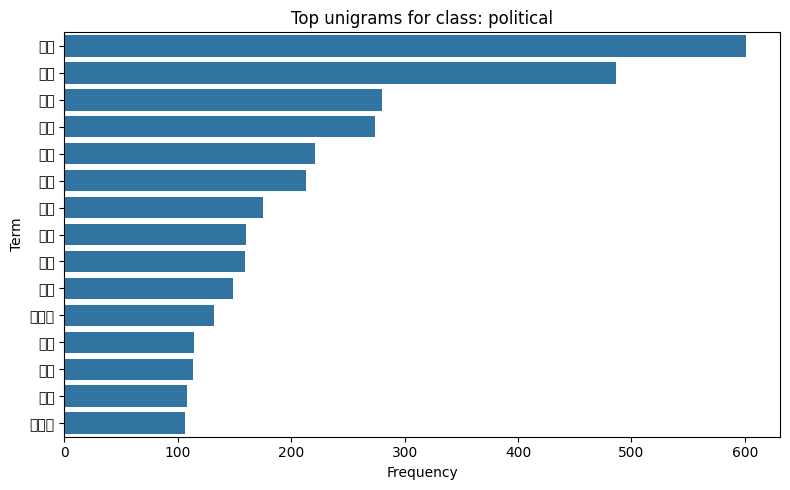

In [47]:
# Example of plotting top terms for one label
example_label = labels[1]
top_uni = top_unigrams_per_class[example_label]

plt.figure(figsize=(8, 5))
sns.barplot(data=top_uni, x="frequency", y="term")
plt.title(f"Top unigrams for class: {example_label}")
plt.xlabel("Frequency")
plt.ylabel("Term")
plt.tight_layout()
plt.show()


=== Proportion of comments with code-mixing/emojis/punctuation per label ===
       Label  has_latin  has_emoji  has_excl  has_qmark
0    neutral   0.059167   0.000000  0.105000   0.110833
1  political   0.000000   0.000000  0.011152   0.089219
2     sexual   0.041841   0.001674  0.104603   0.179916
3     threat   0.035235   0.000000  0.057886   0.075503
4      troll   0.041771   0.000000  0.095238   0.144528


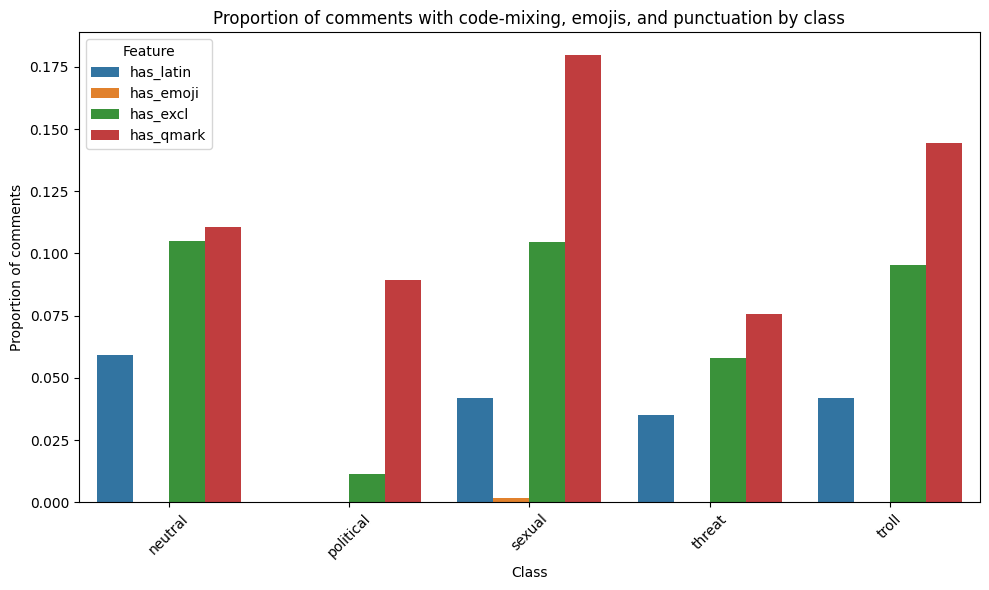

In [56]:
import re

# Code-mixing, emojis and punctuation

# Regex patterns
latin_pattern = re.compile(r"[A-Za-z]")
bangla_pattern = re.compile(r"[\u0980-\u09FF]")

# Emoji ranges (approximate)
emoji_pattern = re.compile(
    "["
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"
    "\U0001F780-\U0001F7FF"
    "\U0001F800-\U0001F8FF"
    "\U0001F900-\U0001F9FF"
    "\U0001FA00-\U0001FA6F"
    "\U0001FA70-\U0001FAFF"
    "]+"
)

def has_latin(text):
    return bool(latin_pattern.search(text))

def has_bangla(text):
    return bool(bangla_pattern.search(text))

def has_emoji(text):
    return bool(emoji_pattern.search(text))

def count_char(text, ch):
    return text.count(ch)

df["has_latin"] = df["Description"].apply(has_latin)
df["has_bangla"] = df["Description"].apply(has_bangla)
df["has_emoji"] = df["Description"].apply(has_emoji)

df["num_excl"] = df["Description"].apply(lambda x: count_char(x, "!"))
df["num_qmark"] = df["Description"].apply(lambda x: count_char(x, "?"))
df["has_excl"] = df["num_excl"] > 0
df["has_qmark"] = df["num_qmark"] > 0

code_mix_stats = (
    df.groupby("Label")[["has_latin", 
                        #"has_bangla",
                         "has_emoji", 
                         "has_excl", 
                         "has_qmark"]]
      .mean()
      .reset_index()
)

print("\n=== Proportion of comments with code-mixing/emojis/punctuation per label ===")
print(code_mix_stats)

# Melt for plotting
plot_df = code_mix_stats.melt(id_vars="Label", var_name="feature", value_name="proportion")

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Label", y="proportion", hue="feature")
plt.title("Proportion of comments with code-mixing, emojis, and punctuation by class")
plt.xlabel("Class")
plt.ylabel("Proportion of comments")
plt.xticks(rotation=45)
plt.legend(title="Feature")
plt.tight_layout()
plt.show()



Number of very short comments (<= 2 words): 373
Short comments per label:
Label
neutral    147
troll      109
sexual      85
threat      32
Name: count, dtype: int64

Sample very short comments:
 Label      Description
sexual   বোকাচোদা একটা।
sexual             নুনু
sexual     সেক্সি গার্ল
sexual   ছ্যাচড়া ব্যাটা
sexual  নাতাশা মাল্কোভা
sexual       শাউয়ার গান
sexual   গরীবের মালকোভা
sexual      ঠুস,ঠুস,ঠুস
sexual         জারজ....
sexual     আচুদা একটা।।
sexual      শতভাতারি :/
sexual      খাড়া খাড়া
sexual        হোগার গান
sexual     শূকরের বীর্য
sexual        নুনুস্রাত
sexual         ওরে মাগী
sexual অশ্লীলতার তুঙ্গে
sexual     মাগি নাম্বার
sexual   মাগিরা বহুরুপি
sexual      খোলা পাজামা

Threshold for very long comments (95th percentile): 57.0 words
Number of very long comments: 294
Long comments per label:
Label
sexual       94
threat       66
political    62
troll        46
neutral      26
Name: count, dtype: int64

Sample very long comments:
 Label  word_len                     

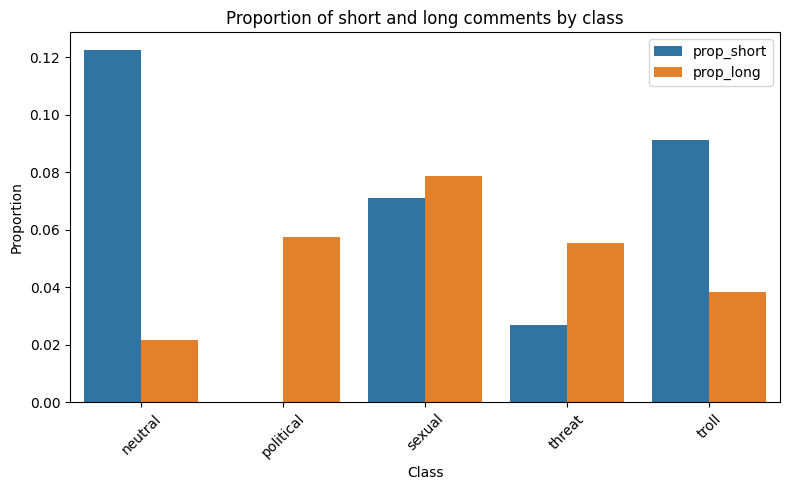

In [61]:
# Noise and quality checks (short & long comments, potential issues)

# Short comments (e.g. <= 2 words)
short_threshold = 2
short_df = df[df["word_len"] <= short_threshold]
print(f"\nNumber of very short comments (<= {short_threshold} words): {len(short_df)}")
print("Short comments per label:")
print(short_df["Label"].value_counts())

print("\nSample very short comments:")
print(short_df[["Label", "Description"]].head(20).to_string(index=False))

# Very long comments (e.g. >= 95th percentile by word_len)
p95 = np.percentile(df["word_len"], 95)
long_df = df[df["word_len"] >= p95]
print(f"\nThreshold for very long comments (95th percentile): {p95} words")
print(f"Number of very long comments: {len(long_df)}")
print("Long comments per label:")
print(long_df["Label"].value_counts())

print("\nSample very long comments:")
print(long_df[["Label", "word_len", "Description"]].head(10).to_string(index=False))

# Distribution of very short / very long ratios by label
df["is_short"] = df["word_len"] <= short_threshold
df["is_long"] = df["word_len"] >= p95

noise_stats = (
    df.groupby("Label")[["is_short", "is_long"]]
      .mean()
      .reset_index()
      .rename(columns={"is_short": "prop_short", "is_long": "prop_long"})
)

print("\n=== Proportion of very short / very long comments per label ===")
print(noise_stats)

plt.figure(figsize=(8, 5))
noise_plot = noise_stats.melt(id_vars="Label", var_name="type", value_name="proportion")
sns.barplot(data=noise_plot, x="Label", y="proportion", hue="type")
plt.title("Proportion of short and long comments by class")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="")
plt.tight_layout()
plt.show()

In [62]:
# Duplicates
dup_rows = df.duplicated(subset=['Description', 'Label']).sum()
print(f"\nNumber of exact duplicate rows (text + label): {dup_rows}")
if dup_rows > 0:
    print("Sample duplicate rows:")
    print(df[df.duplicated(subset=['Description', 'Label'], keep=False)].sort_values(by='Description').head(10))

# Remove Dupicates rows
df = df.drop_duplicates(subset=['Description', 'Label']).reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)



Number of exact duplicate rows (text + label): 0
Shape after dropping duplicates: (5860, 13)


In [63]:
# Sample examples per class
for label in df['Label'].unique():
    print(f"\n --- Examples for class: {label} --- ")
    print(df[df['Label'] == label]['Description'].head(3).to_string(index=False))


 --- Examples for class: sexual --- 
ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা ...
আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি আ...
ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ক...

 --- Examples for class: threat --- 
তুই কই থেকে এসেছ সেটা কি জানিস?সেটাকি দেখেশিস?ত...
                       সে ভোট ডাকাত সরকারের এজেন্ট
জুতা দিয়ে তোমার গালে মারা উচিত, আবাল বক্তব্য দি...

 --- Examples for class: political --- 
ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পার...
     রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে
এইসব ঐক্যধারীরা বাংলাদেশের একটা ওয়ার্ডের চৌকিদা...

 --- Examples for class: troll --- 
                                          পটকা মাছ
সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না কর...
হিরো আলমের দেয়া বিনোদন ব্যক্তিগতভাবে আমার একটু...

 --- Examples for class: neutral --- 
ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছিলেন?
                      অরে বাবা, এই টা কোন পাগল????
                             ক্যাপ্টেন অফ বাংলাদেশ
